# Importing Libraries

In [1]:
!pip install matplotlib==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 2.8 MB/s 
     |████████████████████████████████| 960 kB 57.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import os
import json
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from itertools import zip_longest
from time import gmtime, strftime
import pandas as r
import numpy as np
import pandas as pdr
import plotly.express as px
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
import os

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string
#Machine Learning Algorithms
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

np.random.seed(777)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
MEDIUM_SIZE = 20

plt.style.use(['seaborn'])
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 90  #default is 100

plt.rcParams['font.size']=MEDIUM_SIZE    
plt.rcParams['axes.titlesize']=MEDIUM_SIZE  
plt.rcParams['axes.labelsize']=MEDIUM_SIZE  
plt.rcParams['xtick.labelsize']=MEDIUM_SIZE        
plt.rcParams['ytick.labelsize']=MEDIUM_SIZE          
plt.rcParams['legend.fontsize']=MEDIUM_SIZE   
plt.rcParams['legend.labelcolor']='black'
plt.rcParams['figure.titlesize']=MEDIUM_SIZE     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Balancing

In [ ]:
def get_train_and_test_samples(df_train: pd.DataFrame, df_valid: pd.DataFrame, TfidVectorizer) -> tuple:
  vectorize = TfidVectorizer(max_features=1000, ngram_range=(1,5))
  Xtrain    = vectorize.fit_transform(df_train['text']).toarray()
  Xvalid    = vectorize.fit_transform(df_valid['text']).toarray()

  encoder   = LabelEncoder()
  Ytrain    = encoder.fit_transform(df_train['multiauth_y'])
  Yvalid     = encoder.fit_transform(df_valid['multiauth_y'])
  return (Xtrain, Ytrain, Xvalid, Yvalid)

## Unclean and Unbalanced Dataset

In [ ]:
raw_train = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/train.csv')
raw_valid = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/valid.csv')

##################################################################################################
Xtrain, Ytrain, Xvalid, Yvalid = get_train_and_test_samples(raw_train, raw_valid, TfidfVectorizer)
##################################################################################################

### clean imbalanced

In [ ]:
clean_train = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/train.csv')
clean_valid = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/valid.csv')
##################################################################################################
Xtrain_clean, Ytrain_clean, Xvalid_clean, Yvalid_clean = get_train_and_test_samples(clean_train, clean_valid, TfidfVectorizer)

In [ ]:
Yvalid_clean.shape

(2400,)

## Transpose

### Unclean Transpose

In [ ]:
unclean_transpose_train = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/train.csv')
unclean_transpose_valid = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/valid.csv')

unclean_transpose_train = pd.DataFrame([unclean_transpose_train['text'], unclean_transpose_train['multiauth_y']]).transpose()
unclean_transpose_train = unclean_transpose_train.groupby('multiauth_y')
unclean_transpose_train = pd.DataFrame(unclean_transpose_train.apply(
    lambda x: unclean_transpose_train.sample(unclean_transpose_train.size().min()).reset_index(drop=True)
    )
)

unclean_transpose_train.multiauth_y.value_counts()
# ###################################################################################################################################################################
# unclean_trans_train, unclean_trans_y, unclean_t_valid, unclean_t_y = get_train_and_test_samples(unclean_transpose_train, unclean_transpose_valid, TfidfVectorizer)
# ###################################################################################################################################################################

# sns.countplot(x ='multiauth_y', data = unclean_transpose_train)

0    5600
1    5600
Name: multiauth_y, dtype: int64

In [ ]:
unclean_transpose_train.to_csv("/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/unclean_transpose_train.csv")


In [ ]:
unclean_trans_train
y_train_res = unclean_trans_train.reshape(-1, 1) # reshaping y_train to (398038,1)
# data_res = np.concatenate((unclean_trans_train, y_train_res), axis = 1)

AttributeError: ignored

In [ ]:
y_train_res

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.06087101]])

### Clean Transpose

In [ ]:
clean_transpose_train = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/clean_train.csv')
clean_transpose_valid = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/clean_valid.csv')

clean_transpose_train = pd.DataFrame([clean_transpose_train['text'], clean_transpose_train['multiauth_y']]).transpose()
clean_transpose_train = clean_transpose_train.groupby('multiauth_y')
clean_transpose_train = pd.DataFrame(clean_transpose_train.apply(
    lambda x: clean_transpose_train.sample(clean_transpose_train.size().min()).reset_index(drop=True)
    )
)

# ##############################################################################################################################################################
# clean_trans_train, clean_trans_y, clean_t_valid, clean_t_y = get_train_and_test_samples(clean_transpose_train, clean_transpose_valid, TfidfVectorizer)
# #############################################################################################################################################################

# sns.countplot(x = 'multiauth_y', data = clean_transpose_train)

In [ ]:
clean_transpose_train.head()
clean_transpose_train.to_csv("/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/clean_transpose_train.csv",index=False)


## SMOTE Balancing

### Unclean Smote

In [ ]:
def smote_train_test(Smote_train : pd.DataFrame, Smote_valid : pd.DataFrame, TfidVectorizer) -> tuple:
  vectorize = TfidVectorizer(max_features=1000, ngram_range=(1,5))
  
  Xtrain    = vectorize.fit_transform(Smote_train['text']).toarray()
  Xvalid    = vectorize.fit_transform(Smote_valid['text']).toarray()
  
  encoder   = LabelEncoder()
  Ytrain    = encoder.fit_transform(Smote_train['multiauth_y'])
  Yvalid     = encoder.fit_transform(Smote_valid['multiauth_y'])

  from imblearn.over_sampling import SMOTE
  smote = SMOTE()
  unclean_trainx_sm, unclean_trainy_sm = smote.fit_resample(Xtrain,Ytrain)
  return unclean_trainx_sm,unclean_trainy_sm,Xvalid,Yvalid


In [ ]:
unclean_Smote_train = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/train.csv')
unclean_Smote_valid = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/valid.csv')
smote_trainy = unclean_Smote_train['multiauth_y']

##################################################################################################################################################################
unclean_smote_trainx, unclean_smote_trainy,unlclean_smote_validx,unclean_smote_validy = smote_train_test(unclean_Smote_train, unclean_Smote_valid, TfidfVectorizer)
##################################################################################################################################################################

print("Before OverSampling, counts of label '1': {}".format(sum(smote_trainy == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(smote_trainy == 0))) 

print('After OverSampling, the shape of train_X: {}'.format(unclean_smote_trainx.shape[0])) 
print('After OverSampling, the shape of train_y: {} \n'.format(unclean_smote_trainy.shape[0])) 

print("After OverSampling, counts of label '1': {}".format(sum(unclean_smote_trainy == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(unclean_smote_trainy == 0))) 

Before OverSampling, counts of label '1': 8400
Before OverSampling, counts of label '0': 2800 

After OverSampling, the shape of train_X: 16800
After OverSampling, the shape of train_y: 16800 

After OverSampling, counts of label '1': 8400
After OverSampling, counts of label '0': 8400


### Clean Smote

In [ ]:
clean_Smote_train = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/clean_train.csv')
clean_Smote_valid = pd.read_csv('/content/drive/MyDrive/CLEF_2022/pan_task/pan_style_detection/Our_Models/clean_valid.csv')
c_smote_trainy = unclean_Smote_train['multiauth_y']

##################################################################################################################################################################
clean_smote_trainx, clean_smote_trainy, clean_smote_validx, clean_smote_validy= smote_train_test(clean_Smote_train, clean_Smote_valid, TfidfVectorizer)
##################################################################################################################################################################

print("Before OverSampling, counts of label '1': {}".format(sum(c_smote_trainy == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(c_smote_trainy == 0))) 

print('After OverSampling, the shape of train_X: {}'.format(clean_smote_trainx.shape[0])) 
print('After OverSampling, the shape of train_y: {} \n'.format(clean_smote_trainy.shape[0])) 

print("After OverSampling, counts of label '1': {}".format(sum(clean_smote_trainy == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(clean_smote_trainy == 0))) 

Before OverSampling, counts of label '1': 8400
Before OverSampling, counts of label '0': 2800 

After OverSampling, the shape of train_X: 16800
After OverSampling, the shape of train_y: 16800 

After OverSampling, counts of label '1': 8400
After OverSampling, counts of label '0': 8400


# Machine Learning Models

In [ ]:
from typing import List
import seaborn as sn
from sklearn import metrics

class Classifier:
  def __init__(self, clf, name: str):
    self.classifier = clf
    self.name       = name

  def train(self, Xtrain, Ytrain, Xtest, Ytest):
    self.classifier.fit(Xtrain, Ytrain)

    self.predict = self.classifier.predict(Xtest)
    self.Ytest   = Ytest
    self.acc     = round(accuracy_score(Ytest, self.predict)*100, 4)
    self.f1_micro=round(f1_score(self.Ytest,self.predict,
                                average='micro'))
    self.recal_micro=round(recall_score(self.Ytest,self.predict,
                                average='micro'))
    self.precision_micro=round(precision_score(self.Ytest,self.predict,
                                average='micro'))
    

    return self.predict, self.Ytest

  def __lt__(self, other):
      if not isinstance(other, type(self)): return NotImplemented
      return self.acc < other.acc

  def __eq__(self, other):
      if not isinstance(other, type(self)): return NotImplemented
      return self.acc == other.acc

  def __str__(self):
    try:
      return "%s:\nAccurracy: %s\nRecall and Precision:\n%s" %(self.name, self.acc, classification_report(self.Ytest, self.predict))
    except AttributeError:
      raise RuntimeError("Model not trained")

class ClassifierCollection:
  def __init__(self, collection: List[Classifier] = []) -> None:
      self._collection = collection
  
  def add_classifier(self, classifier: Classifier):
      self._collection.append(classifier)
  
  def train(self, Xtrain, Ytrain, Xtest, Ytest):
    for clf in self._collection:
      self.predict, self.Ytest = clf.train(Xtrain, Ytrain, Xtest, Ytest)

  def ploting(self):
    cm = metrics.confusion_matrix(self.Ytest,self.predict)
    plt.figure(figsize = (8,6))
    sns.heatmap(cm,cmap= "Blues", 
                linecolor = 'black', 
                linewidth = 1, 
                annot = True, 
                fmt='', 
                )
    plt.xlabel("Predicted")
    sn.set(font_scale=2)

    plt.ylabel("Actual")
    cm = metrics.confusion_matrix(self.Ytest,self.predict)
    sn.set(font_scale=2)   

  def sort_by_accuracy(self):
    self._collection.sort(
            key = lambda clf: clf.acc
        ) 
  def get_max(self):
    return max(self._collection)

  def get_list_accuracy(self):
    return {
        clf.name: clf.acc for clf in self._collection 
    }
  def __str__(self):
    return ('#'*10 + '\n').join([str(clf) for clf in self._collection])

In [ ]:
def get_collection_of_RFs(clf_collection: ClassifierCollection):
  for number_trees in range(25,300,25):
    clf_collection.add_classifier(Classifier(
        RandomForestClassifier(n_estimators = number_trees), 
        "Random Forest n_estimators = %i" %(number_trees)))

def get_collection_of_Bayes(clf_collection: ClassifierCollection):
  clf_collection.add_classifier(Classifier( GaussianNB(), "GaussianNB"))
  clf_collection.add_classifier(Classifier( MultinomialNB(), "MultinomialNB"))

def get_collection_of_XGB(clf_collection: ClassifierCollection):
  clf_collection.add_classifier(Classifier( xgb.XGBClassifier(),   "XGB"))
  clf_collection.add_classifier(Classifier( xgb.XGBRFClassifier(), "XGBRF"))

def get_collection_of_KNN(clf_collection: ClassifierCollection):
  clf_collection.add_classifier(Classifier(KNeighborsClassifier(n_neighbors = 5), "KNN"))

def get_collection_of_Logistic_regression(clf_collection: ClassifierCollection):
  clf_collection.add_classifier(Classifier(LogisticRegression(),   "Logistric regrssion"))

def get_collection_of_SVM(clf_collection: ClassifierCollection):
  clf_collection.add_classifier(Classifier(SVC(),   "Support Vector Machine"))

def get_collection_of_Decision_Tree(clf_collection: ClassifierCollection):
  clf_collection.add_classifier(Classifier(DecisionTreeClassifier(),   "Decision Tree"))


## Random Forest Classifier

### Unclean & Unbalanced

List of Accuracies ::  {'Random Forest n_estimators = 25': 65.375, 'Random Forest n_estimators = 50': 58.125, 'Random Forest n_estimators = 75': 72.0417, 'Random Forest n_estimators = 100': 69.7917, 'Random Forest n_estimators = 125': 68.0417, 'Random Forest n_estimators = 150': 73.375, 'Random Forest n_estimators = 175': 74.4583, 'Random Forest n_estimators = 200': 73.4583, 'Random Forest n_estimators = 225': 72.9167, 'Random Forest n_estimators = 250': 73.25, 'Random Forest n_estimators = 275': 74.0833}
Get Maximum Result ::  Random Forest n_estimators = 175:
Accurracy: 74.4583
Recall and Precision:
              precision    recall  f1-score   support

           0       0.48      0.34      0.40       600
           1       0.80      0.88      0.84      1800

    accuracy                           0.74      2400
   macro avg       0.64      0.61      0.62      2400
weighted avg       0.72      0.74      0.73      2400



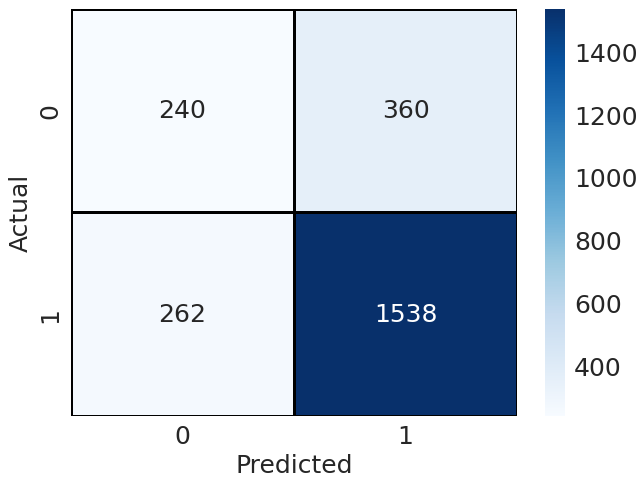

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_RFs(clf_collection_tf)
clf_collection_tf.train(Xtrain, Ytrain, Xvalid, Yvalid)               ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()


### Unclean Trasnpose

List of Accuracies ::  {'Random Forest n_estimators = 25': 54.3333, 'Random Forest n_estimators = 50': 58.2917, 'Random Forest n_estimators = 75': 62.1667, 'Random Forest n_estimators = 100': 60.125, 'Random Forest n_estimators = 125': 57.125, 'Random Forest n_estimators = 150': 59.5, 'Random Forest n_estimators = 175': 63.1667, 'Random Forest n_estimators = 200': 64.0, 'Random Forest n_estimators = 225': 57.5, 'Random Forest n_estimators = 250': 67.6667, 'Random Forest n_estimators = 275': 61.7917}
Get Maximum Result ::  Random Forest n_estimators = 250:
Accurracy: 67.6667
Recall and Precision:
              precision    recall  f1-score   support

           0       0.39      0.51      0.44       600
           1       0.82      0.73      0.77      1800

    accuracy                           0.68      2400
   macro avg       0.60      0.62      0.61      2400
weighted avg       0.71      0.68      0.69      2400



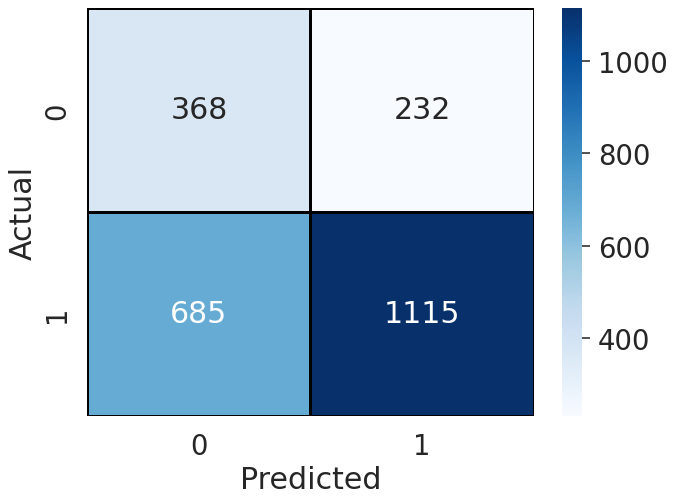

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_RFs(clf_collection_tf)
clf_collection_tf.train(unclean_trans_train, unclean_trans_y, unclean_t_valid, unclean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Transpose

List of Accuracies ::  {'Random Forest n_estimators = 25': 58.4583, 'Random Forest n_estimators = 50': 56.1667, 'Random Forest n_estimators = 75': 60.625, 'Random Forest n_estimators = 100': 59.5833, 'Random Forest n_estimators = 125': 62.8333, 'Random Forest n_estimators = 150': 62.7083, 'Random Forest n_estimators = 175': 64.1667, 'Random Forest n_estimators = 200': 62.7083, 'Random Forest n_estimators = 225': 62.9167, 'Random Forest n_estimators = 250': 63.4583, 'Random Forest n_estimators = 275': 65.2917}
Get Maximum Result ::  Random Forest n_estimators = 275:
Accurracy: 65.2917
Recall and Precision:
              precision    recall  f1-score   support

           0       0.34      0.40      0.37       600
           1       0.79      0.74      0.76      1800

    accuracy                           0.65      2400
   macro avg       0.56      0.57      0.56      2400
weighted avg       0.67      0.65      0.66      2400



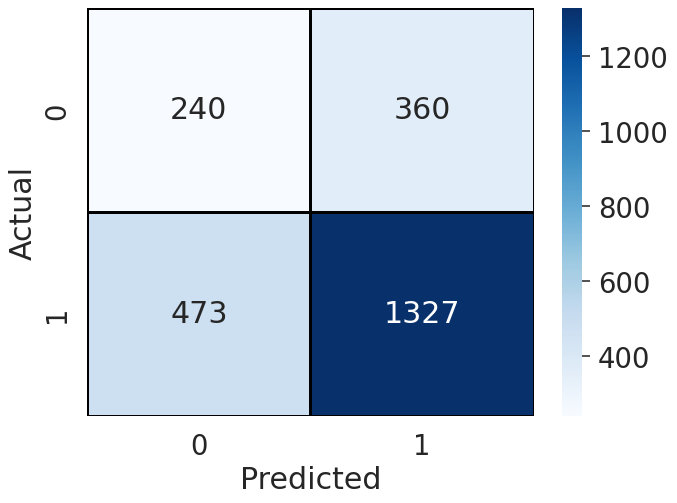

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_RFs(clf_collection_tf)
clf_collection_tf.train(clean_trans_train, clean_trans_y, clean_t_valid, clean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Smote

List of Accuracies ::  {'Random Forest n_estimators = 25': 62.3333, 'Random Forest n_estimators = 50': 63.5, 'Random Forest n_estimators = 75': 69.75, 'Random Forest n_estimators = 100': 72.0417, 'Random Forest n_estimators = 125': 72.25, 'Random Forest n_estimators = 150': 69.4583, 'Random Forest n_estimators = 175': 72.3333, 'Random Forest n_estimators = 200': 72.0, 'Random Forest n_estimators = 225': 71.375, 'Random Forest n_estimators = 250': 72.7083, 'Random Forest n_estimators = 275': 73.7083}
Get Maximum Result ::  Random Forest n_estimators = 275:
Accurracy: 73.7083
Recall and Precision:
              precision    recall  f1-score   support

           0       0.46      0.31      0.37       600
           1       0.79      0.88      0.83      1800

    accuracy                           0.74      2400
   macro avg       0.63      0.60      0.60      2400
weighted avg       0.71      0.74      0.72      2400



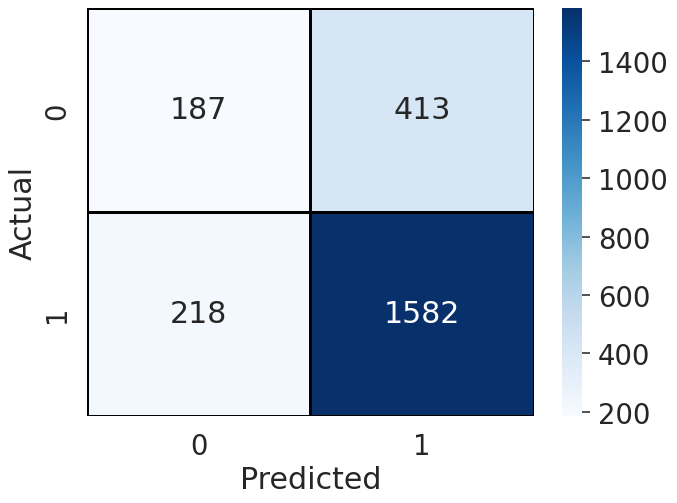

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_RFs(clf_collection_tf)
clf_collection_tf.train(unclean_smote_trainx, unclean_smote_trainy,unlclean_smote_validx,unclean_smote_validy)           ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Smote

List of Accuracies ::  {'Random Forest n_estimators = 25': 57.8333, 'Random Forest n_estimators = 50': 58.1667, 'Random Forest n_estimators = 75': 63.2917, 'Random Forest n_estimators = 100': 64.9167, 'Random Forest n_estimators = 125': 65.5417, 'Random Forest n_estimators = 150': 63.5417, 'Random Forest n_estimators = 175': 66.5833, 'Random Forest n_estimators = 200': 65.9167, 'Random Forest n_estimators = 225': 67.25, 'Random Forest n_estimators = 250': 65.75, 'Random Forest n_estimators = 275': 66.75}
Get Maximum Result ::  Random Forest n_estimators = 225:
Accurracy: 67.25
Recall and Precision:
              precision    recall  f1-score   support

           0       0.25      0.15      0.19       600
           1       0.75      0.85      0.79      1800

    accuracy                           0.67      2400
   macro avg       0.50      0.50      0.49      2400
weighted avg       0.62      0.67      0.64      2400



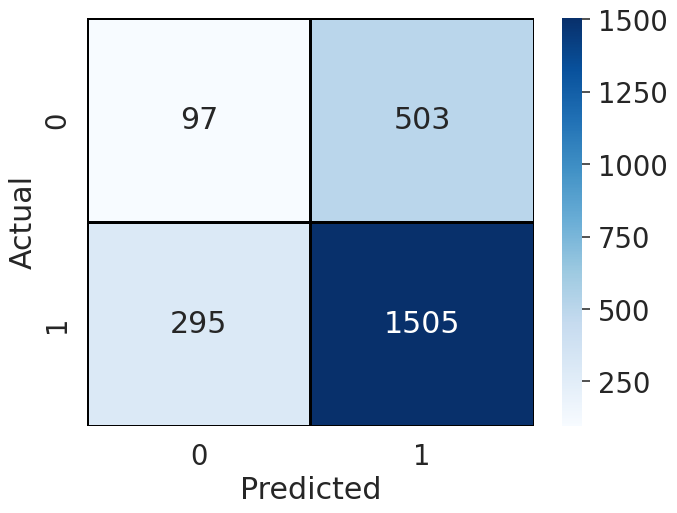

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_RFs(clf_collection_tf)
clf_collection_tf.train(clean_smote_trainx, clean_smote_trainy, clean_smote_validx, clean_smote_validy)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### clean imbalanced

List of Accuracies ::  {'Random Forest n_estimators = 25': 71.625, 'Random Forest n_estimators = 50': 65.0417, 'Random Forest n_estimators = 75': 69.5417, 'Random Forest n_estimators = 100': 70.25, 'Random Forest n_estimators = 125': 72.625, 'Random Forest n_estimators = 150': 72.7083, 'Random Forest n_estimators = 175': 75.2917, 'Random Forest n_estimators = 200': 74.2917, 'Random Forest n_estimators = 225': 74.875, 'Random Forest n_estimators = 250': 76.0833, 'Random Forest n_estimators = 275': 74.9167}
Get Maximum Result ::  Random Forest n_estimators = 250:
Accurracy: 76.0833
Recall and Precision:
              precision    recall  f1-score   support

           0       0.54      0.33      0.41       600
           1       0.80      0.91      0.85      1800

    accuracy                           0.76      2400
   macro avg       0.67      0.62      0.63      2400
weighted avg       0.74      0.76      0.74      2400



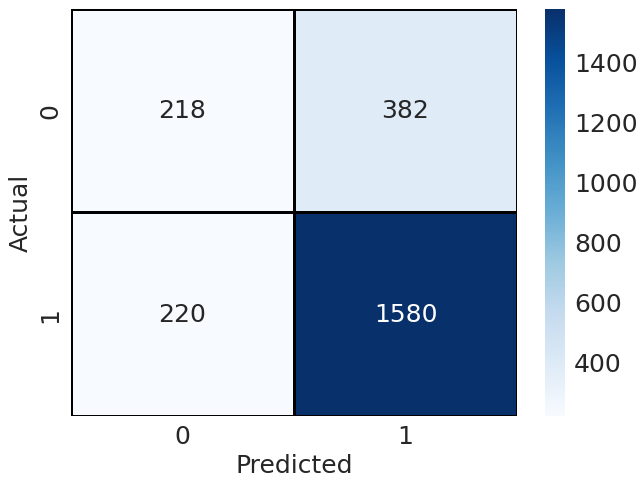

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_RFs(clf_collection_tf)
clf_collection_tf.train(Xtrain_clean, Ytrain_clean, Xvalid_clean, Yvalid_clean)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

## Naive Bayes Classifier

### Unclean & Unbalanced

List of Accuracies ::  {'GaussianNB': 48.6667, 'MultinomialNB': 75.0}
Get Maximum Result ::  MultinomialNB:
Accurracy: 75.0
Recall and Precision:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       600
           1       0.75      1.00      0.86      1800

    accuracy                           0.75      2400
   macro avg       0.38      0.50      0.43      2400
weighted avg       0.56      0.75      0.64      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


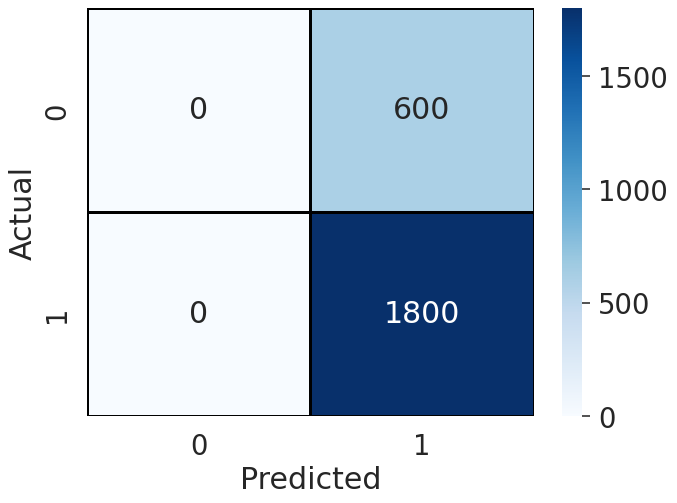

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Bayes(clf_collection_tf)
clf_collection_tf.train(Xtrain, Ytrain, Xvalid, Yvalid)               ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Trasnpose

List of Accuracies ::  {'GaussianNB': 34.4167, 'MultinomialNB': 43.8333}
Get Maximum Result ::  MultinomialNB:
Accurracy: 43.8333
Recall and Precision:
              precision    recall  f1-score   support

           0       0.26      0.70      0.38       600
           1       0.78      0.35      0.48      1800

    accuracy                           0.44      2400
   macro avg       0.52      0.53      0.43      2400
weighted avg       0.65      0.44      0.46      2400



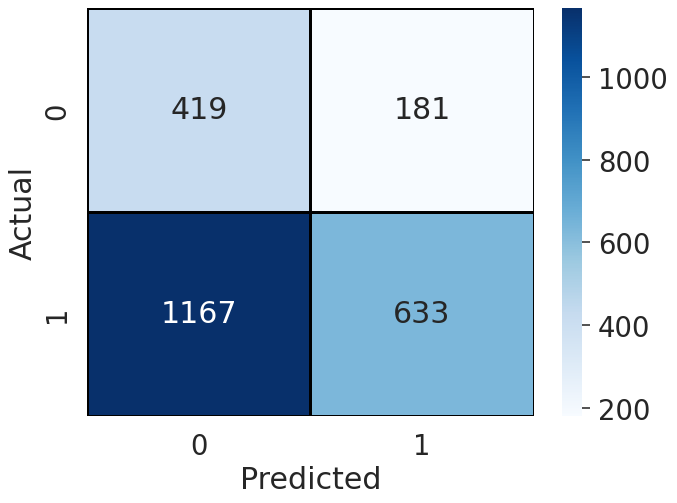

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Bayes(clf_collection_tf)
clf_collection_tf.train(unclean_trans_train, unclean_trans_y, unclean_t_valid, unclean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Transpose

List of Accuracies ::  {'GaussianNB': 44.2083, 'MultinomialNB': 50.875}
Get Maximum Result ::  MultinomialNB:
Accurracy: 50.875
Recall and Precision:
              precision    recall  f1-score   support

           0       0.27      0.56      0.36       600
           1       0.77      0.49      0.60      1800

    accuracy                           0.51      2400
   macro avg       0.52      0.53      0.48      2400
weighted avg       0.65      0.51      0.54      2400



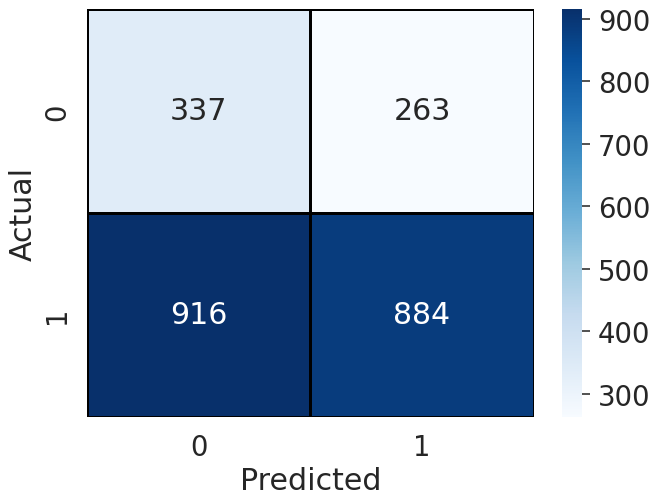

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Bayes(clf_collection_tf)
clf_collection_tf.train(clean_trans_train, clean_trans_y, clean_t_valid, clean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Smote

List of Accuracies ::  {'GaussianNB': 75.0417, 'MultinomialNB': 71.6667}
Get Maximum Result ::  GaussianNB:
Accurracy: 75.0417
Recall and Precision:
              precision    recall  f1-score   support

           0       0.52      0.02      0.04       600
           1       0.75      0.99      0.86      1800

    accuracy                           0.75      2400
   macro avg       0.64      0.51      0.45      2400
weighted avg       0.69      0.75      0.65      2400



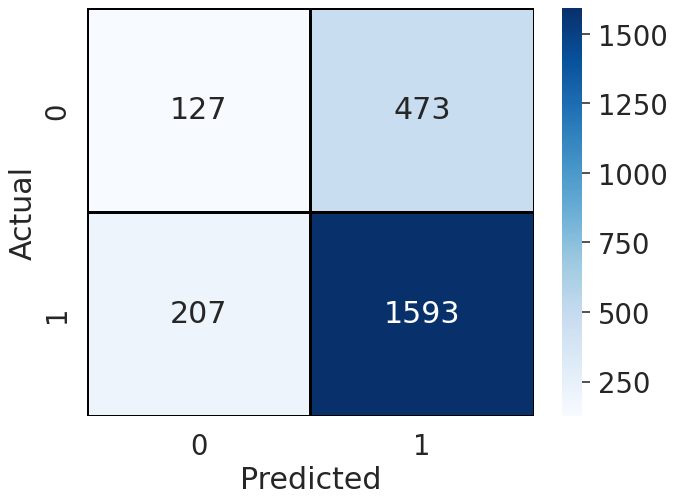

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Bayes(clf_collection_tf)
clf_collection_tf.train(unclean_smote_trainx, unclean_smote_trainy,unlclean_smote_validx,unclean_smote_validy)           ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Smote

List of Accuracies ::  {'GaussianNB': 70.125, 'MultinomialNB': 55.7083}
Get Maximum Result ::  GaussianNB:
Accurracy: 70.125
Recall and Precision:
              precision    recall  f1-score   support

           0       0.31      0.16      0.21       600
           1       0.76      0.88      0.82      1800

    accuracy                           0.70      2400
   macro avg       0.53      0.52      0.51      2400
weighted avg       0.65      0.70      0.66      2400



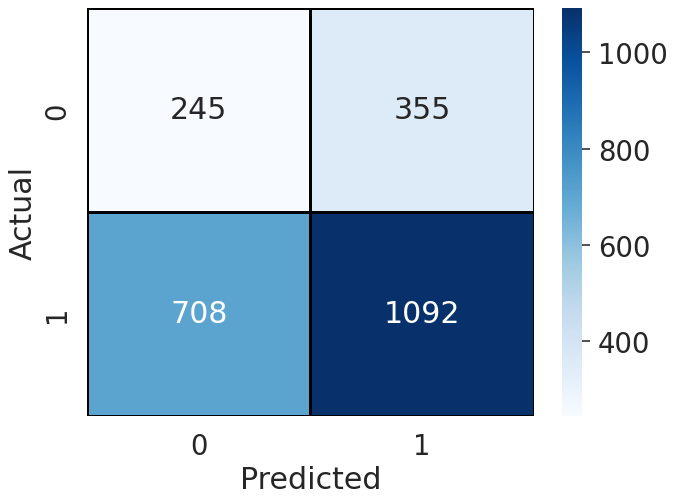

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Bayes(clf_collection_tf)
clf_collection_tf.train(clean_smote_trainx, clean_smote_trainy, clean_smote_validx, clean_smote_validy)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### imbalaned clean/

List of Accuracies ::  {'GaussianNB': 48.6667, 'MultinomialNB': 75.0}
Get Maximum Result ::  MultinomialNB:
Accurracy: 75.0
Recall and Precision:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       600
           1       0.75      1.00      0.86      1800

    accuracy                           0.75      2400
   macro avg       0.38      0.50      0.43      2400
weighted avg       0.56      0.75      0.64      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


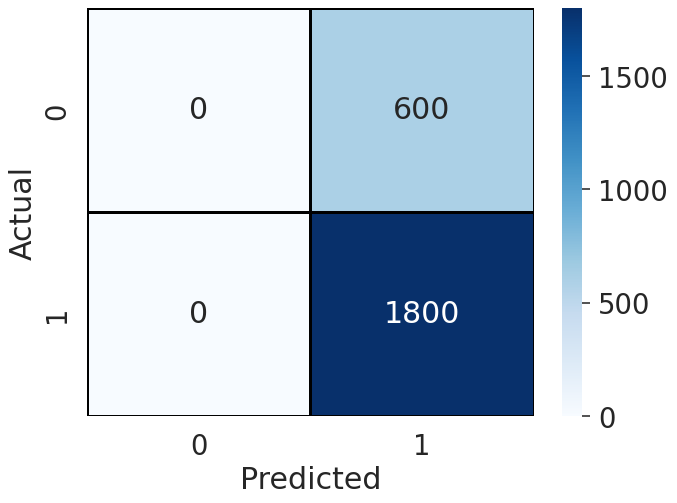

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Bayes(clf_collection_tf)
clf_collection_tf.train(Xtrain_clean, Ytrain_clean, Xvalid_clean, Yvalid_clean)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

## XGBoost Classifier

### Unclean & Unbalanced

List of Accuracies ::  {'XGB': 45.875, 'XGBRF': 77.5833}
Get Maximum Result ::  XGBRF:
Accurracy: 77.5833
Recall and Precision:
              precision    recall  f1-score   support

           0       0.62      0.27      0.37       600
           1       0.79      0.95      0.86      1800

    accuracy                           0.78      2400
   macro avg       0.71      0.61      0.62      2400
weighted avg       0.75      0.78      0.74      2400



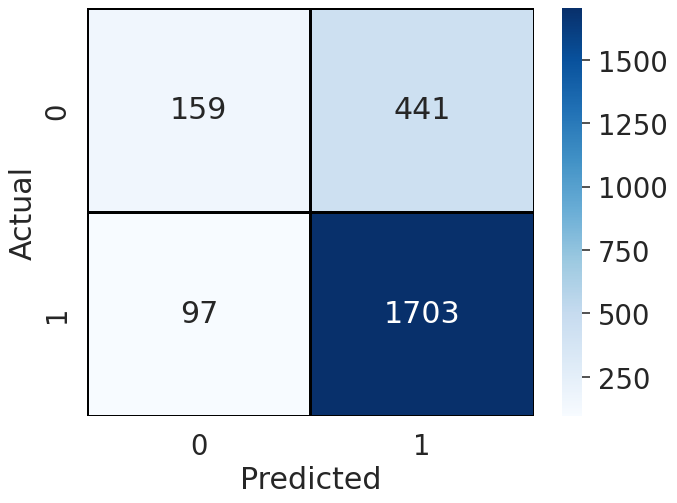

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_XGB(clf_collection_tf)
clf_collection_tf.train(Xtrain, Ytrain, Xvalid, Yvalid)               ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Trasnpose

List of Accuracies ::  {'XGB': 38.2083, 'XGBRF': 70.5833}
Get Maximum Result ::  XGBRF:
Accurracy: 70.5833
Recall and Precision:
              precision    recall  f1-score   support

           0       0.42      0.47      0.44       600
           1       0.82      0.78      0.80      1800

    accuracy                           0.71      2400
   macro avg       0.62      0.63      0.62      2400
weighted avg       0.72      0.71      0.71      2400



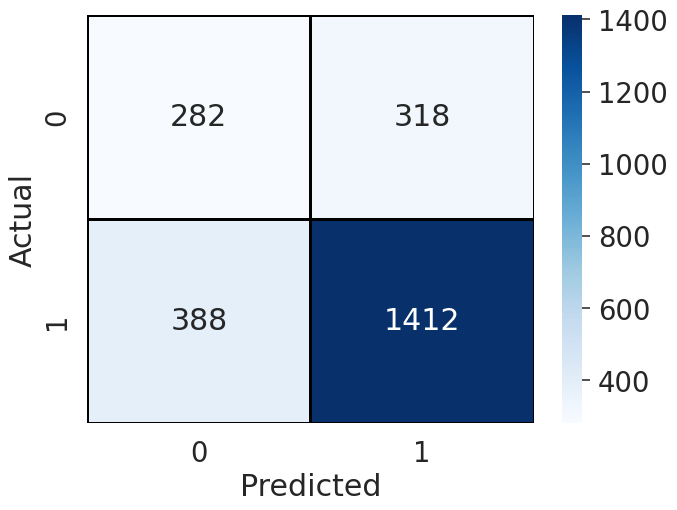

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_XGB(clf_collection_tf)
clf_collection_tf.train(unclean_trans_train, unclean_trans_y, unclean_t_valid, unclean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Transpose

List of Accuracies ::  {'XGB': 34.4167, 'XGBRF': 36.125}
Get Maximum Result ::  XGBRF:
Accurracy: 36.125
Recall and Precision:
              precision    recall  f1-score   support

           0       0.25      0.79      0.38       600
           1       0.76      0.22      0.34      1800

    accuracy                           0.36      2400
   macro avg       0.50      0.50      0.36      2400
weighted avg       0.63      0.36      0.35      2400



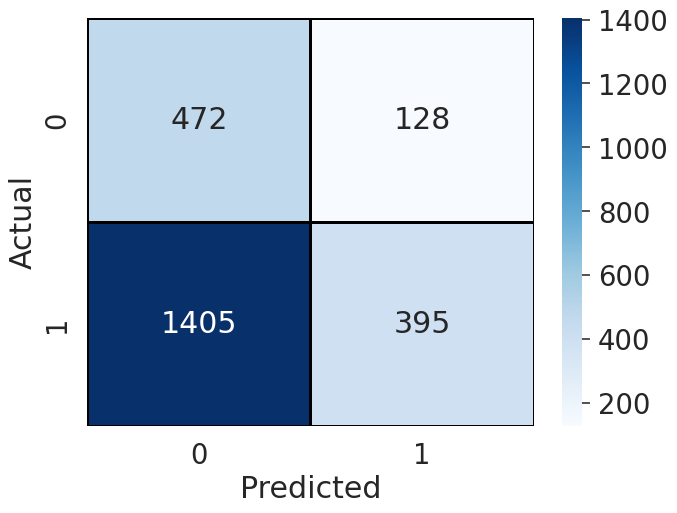

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_XGB(clf_collection_tf)
clf_collection_tf.train(clean_trans_train, clean_trans_y, clean_t_valid, clean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Smote

List of Accuracies ::  {'XGB': 74.0417, 'XGBRF': 76.1667}
Get Maximum Result ::  XGBRF:
Accurracy: 76.1667
Recall and Precision:
              precision    recall  f1-score   support

           0       0.54      0.29      0.38       600
           1       0.80      0.92      0.85      1800

    accuracy                           0.76      2400
   macro avg       0.67      0.60      0.62      2400
weighted avg       0.73      0.76      0.73      2400



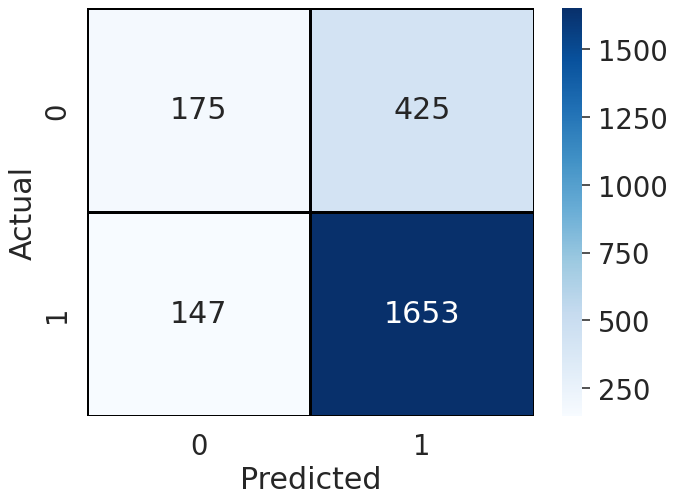

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_XGB(clf_collection_tf)
clf_collection_tf.train(unclean_smote_trainx, unclean_smote_trainy,unlclean_smote_validx,unclean_smote_validy)           ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Smote

List of Accuracies ::  {'XGB': 61.2083, 'XGBRF': 63.7083}
Get Maximum Result ::  XGBRF:
Accurracy: 63.7083
Recall and Precision:
              precision    recall  f1-score   support

           0       0.21      0.17      0.19       600
           1       0.74      0.79      0.77      1800

    accuracy                           0.64      2400
   macro avg       0.48      0.48      0.48      2400
weighted avg       0.61      0.64      0.62      2400



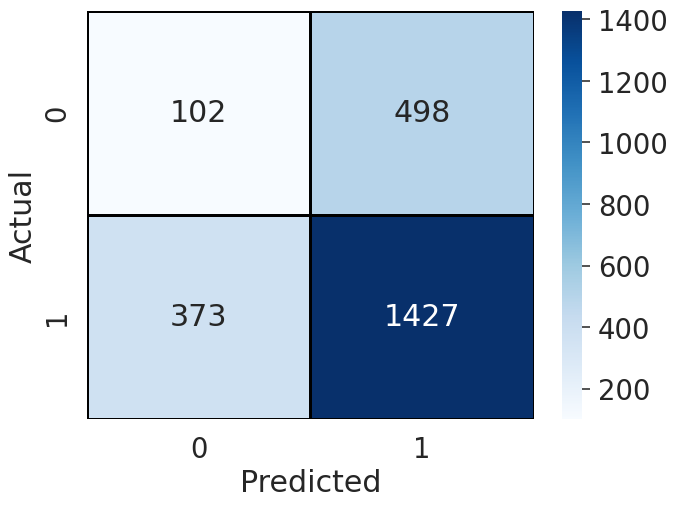

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_XGB(clf_collection_tf)
clf_collection_tf.train(clean_smote_trainx, clean_smote_trainy, clean_smote_validx, clean_smote_validy)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### imbalanced clean

List of Accuracies ::  {'XGB': 45.875, 'XGBRF': 77.5833}
Get Maximum Result ::  XGBRF:
Accurracy: 77.5833
Recall and Precision:
              precision    recall  f1-score   support

           0       0.62      0.27      0.37       600
           1       0.79      0.95      0.86      1800

    accuracy                           0.78      2400
   macro avg       0.71      0.61      0.62      2400
weighted avg       0.75      0.78      0.74      2400



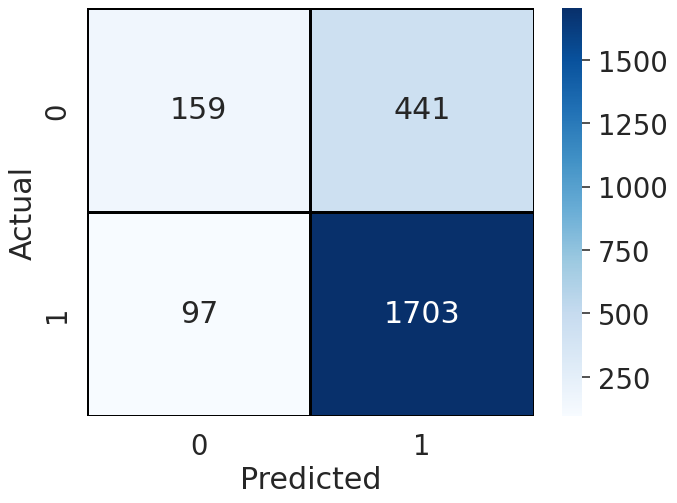

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_XGB(clf_collection_tf)
clf_collection_tf.train(Xtrain_clean, Ytrain_clean, Xvalid_clean, Yvalid_clean)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

## KNN Classifier

### Unclean & Unbalanced

List of Accuracies ::  {'KNN': 72.3333}
Get Maximum Result ::  KNN:
Accurracy: 72.3333
Recall and Precision:
              precision    recall  f1-score   support

           0       0.32      0.10      0.15       600
           1       0.76      0.93      0.83      1800

    accuracy                           0.72      2400
   macro avg       0.54      0.51      0.49      2400
weighted avg       0.65      0.72      0.66      2400



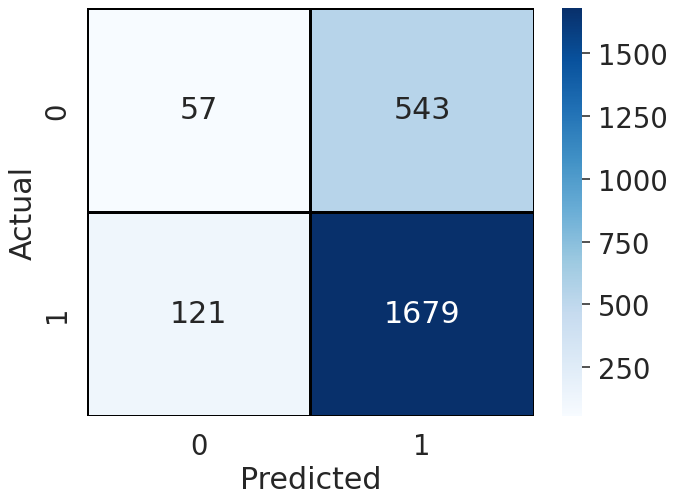

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_KNN(clf_collection_tf)
clf_collection_tf.train(Xtrain, Ytrain, Xvalid, Yvalid)               ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Trasnpose

List of Accuracies ::  {'KNN': 55.7917}
Get Maximum Result ::  KNN:
Accurracy: 55.7917
Recall and Precision:
              precision    recall  f1-score   support

           0       0.26      0.41      0.31       600
           1       0.75      0.61      0.67      1800

    accuracy                           0.56      2400
   macro avg       0.51      0.51      0.49      2400
weighted avg       0.63      0.56      0.58      2400



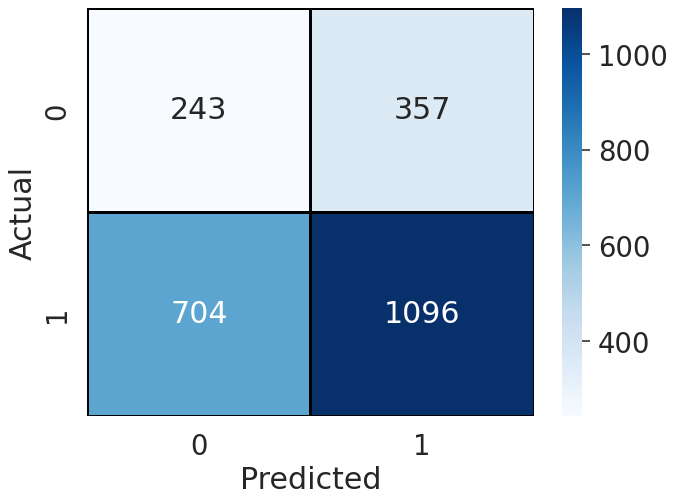

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_KNN(clf_collection_tf)
clf_collection_tf.train(unclean_trans_train, unclean_trans_y, unclean_t_valid, unclean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Transpose

List of Accuracies ::  {'KNN': 52.25}
Get Maximum Result ::  KNN:
Accurracy: 52.25
Recall and Precision:
              precision    recall  f1-score   support

           0       0.25      0.47      0.33       600
           1       0.75      0.54      0.63      1800

    accuracy                           0.52      2400
   macro avg       0.50      0.51      0.48      2400
weighted avg       0.63      0.52      0.55      2400



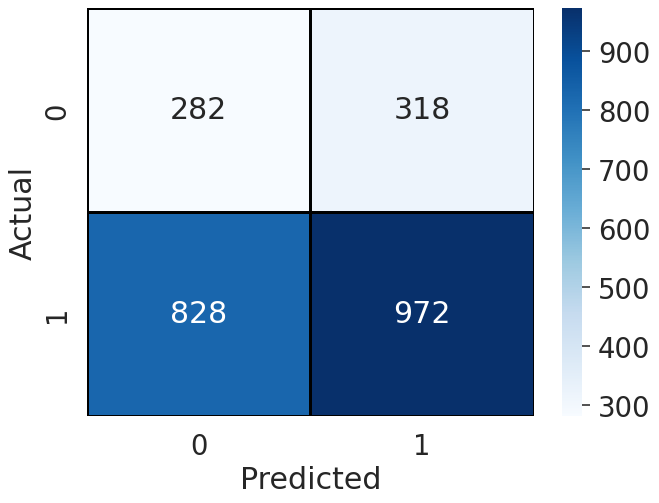

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_KNN(clf_collection_tf)
clf_collection_tf.train(clean_trans_train, clean_trans_y, clean_t_valid, clean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Smote

List of Accuracies ::  {'KNN': 25.6667}
Get Maximum Result ::  KNN:
Accurracy: 25.6667
Recall and Precision:
              precision    recall  f1-score   support

           0       0.25      0.98      0.40       600
           1       0.71      0.01      0.03      1800

    accuracy                           0.26      2400
   macro avg       0.48      0.50      0.21      2400
weighted avg       0.60      0.26      0.12      2400



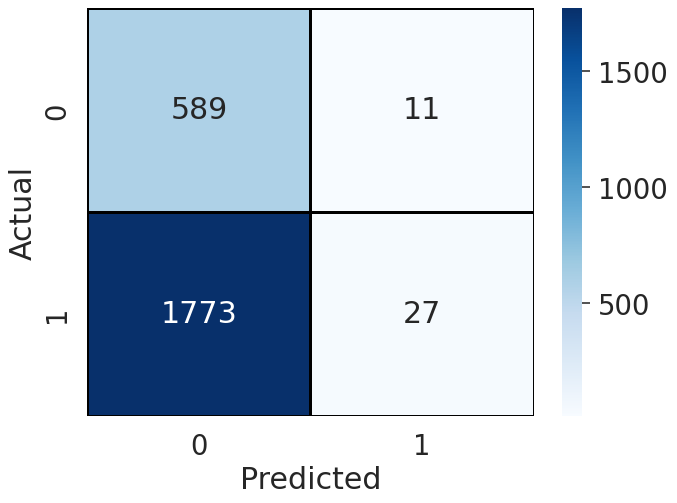

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_KNN(clf_collection_tf)
clf_collection_tf.train(unclean_smote_trainx, unclean_smote_trainy,unlclean_smote_validx,unclean_smote_validy)           ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Smote

List of Accuracies ::  {'KNN': 26.6667}
Get Maximum Result ::  KNN:
Accurracy: 26.6667
Recall and Precision:
              precision    recall  f1-score   support

           0       0.25      0.96      0.40       600
           1       0.73      0.04      0.07      1800

    accuracy                           0.27      2400
   macro avg       0.49      0.50      0.23      2400
weighted avg       0.61      0.27      0.15      2400



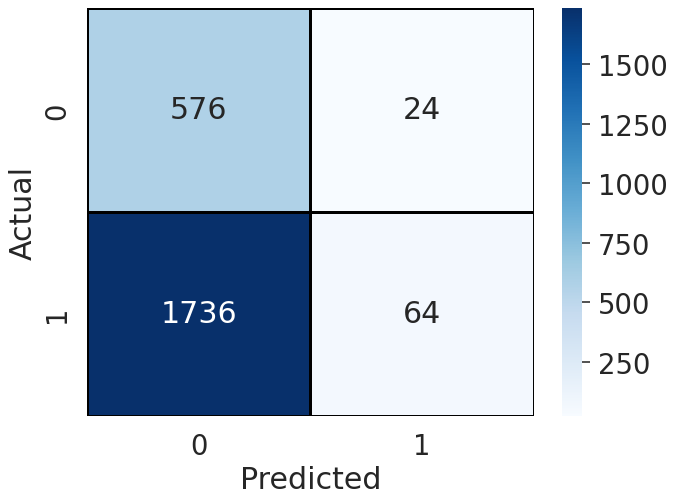

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_KNN(clf_collection_tf)
clf_collection_tf.train(clean_smote_trainx, clean_smote_trainy, clean_smote_validx, clean_smote_validy)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### clean imbalanced

List of Accuracies ::  {'KNN': 72.3333}
Get Maximum Result ::  KNN:
Accurracy: 72.3333
Recall and Precision:
              precision    recall  f1-score   support

           0       0.32      0.10      0.15       600
           1       0.76      0.93      0.83      1800

    accuracy                           0.72      2400
   macro avg       0.54      0.51      0.49      2400
weighted avg       0.65      0.72      0.66      2400



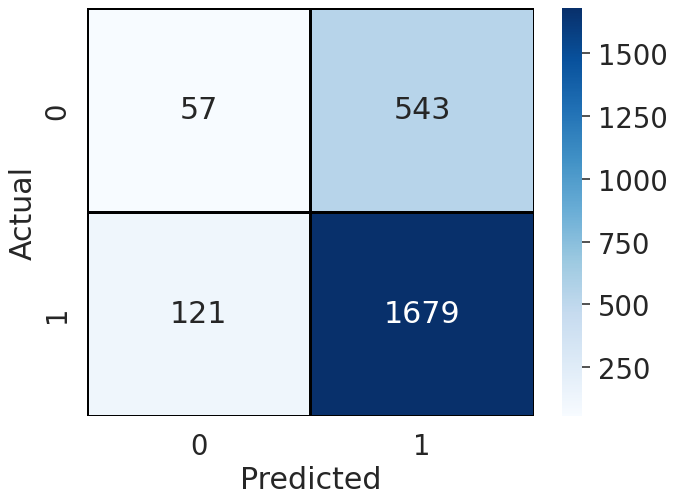

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_KNN(clf_collection_tf)
clf_collection_tf.train(Xtrain_clean, Ytrain_clean, Xvalid_clean, Yvalid_clean)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

## Logistic regression Classifier

### Unclean & Unbalanced

List of Accuracies ::  {'Logistric regrssion': 50.3333}
Get Maximum Result ::  Logistric regrssion:
Accurracy: 50.3333
Recall and Precision:
              precision    recall  f1-score   support

           0       0.31      0.79      0.44       600
           1       0.85      0.41      0.55      1800

    accuracy                           0.50      2400
   macro avg       0.58      0.60      0.50      2400
weighted avg       0.72      0.50      0.52      2400



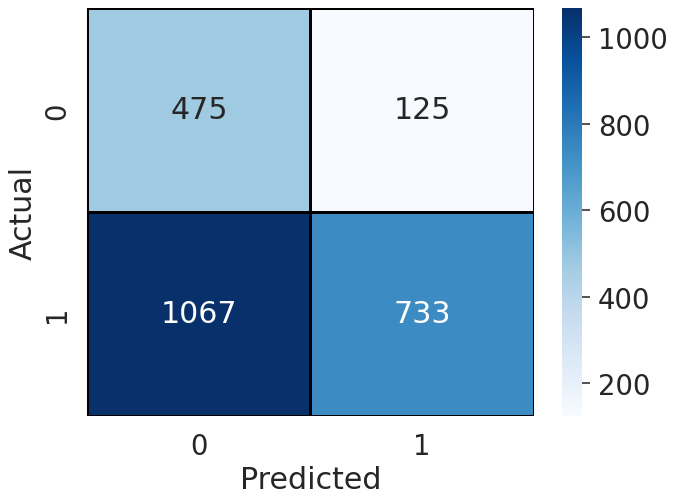

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Logistic_regression(clf_collection_tf)
clf_collection_tf.train(Xtrain, Ytrain, Xvalid, Yvalid)               ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Trasnpose

List of Accuracies ::  {'Logistric regrssion': 25.5833}
Get Maximum Result ::  Logistric regrssion:
Accurracy: 25.5833
Recall and Precision:
              precision    recall  f1-score   support

           0       0.25      0.99      0.40       600
           1       0.82      0.01      0.02      1800

    accuracy                           0.26      2400
   macro avg       0.53      0.50      0.21      2400
weighted avg       0.68      0.26      0.11      2400



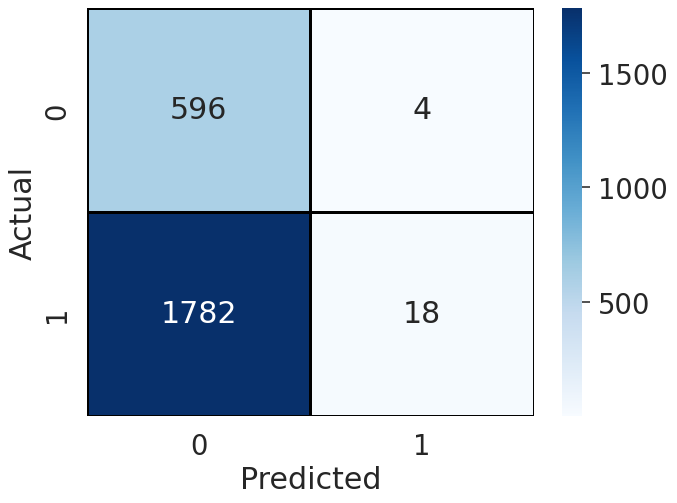

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Logistic_regression(clf_collection_tf)
clf_collection_tf.train(unclean_trans_train, unclean_trans_y, unclean_t_valid, unclean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Transpose

List of Accuracies ::  {'Logistric regrssion': 46.8333}
Get Maximum Result ::  Logistric regrssion:
Accurracy: 46.8333
Recall and Precision:
              precision    recall  f1-score   support

           0       0.28      0.71      0.40       600
           1       0.80      0.39      0.52      1800

    accuracy                           0.47      2400
   macro avg       0.54      0.55      0.46      2400
weighted avg       0.67      0.47      0.49      2400



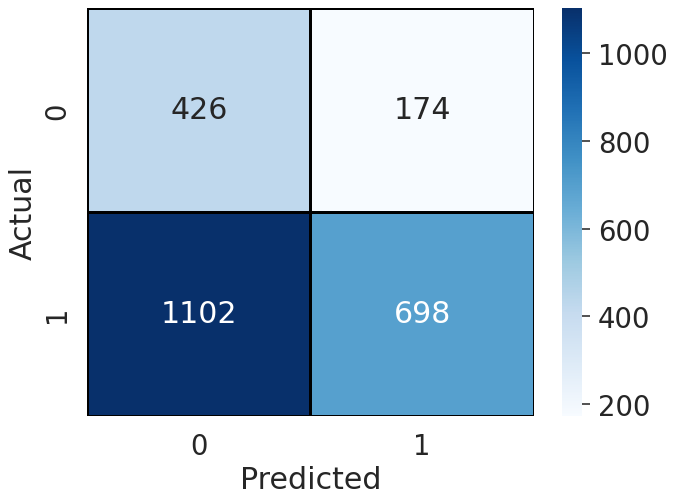

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Logistic_regression(clf_collection_tf)
clf_collection_tf.train(clean_trans_train, clean_trans_y, clean_t_valid, clean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Smote

List of Accuracies ::  {'Logistric regrssion': 48.9583}
Get Maximum Result ::  Logistric regrssion:
Accurracy: 48.9583
Recall and Precision:
              precision    recall  f1-score   support

           0       0.30      0.76      0.43       600
           1       0.83      0.40      0.54      1800

    accuracy                           0.49      2400
   macro avg       0.56      0.58      0.48      2400
weighted avg       0.70      0.49      0.51      2400



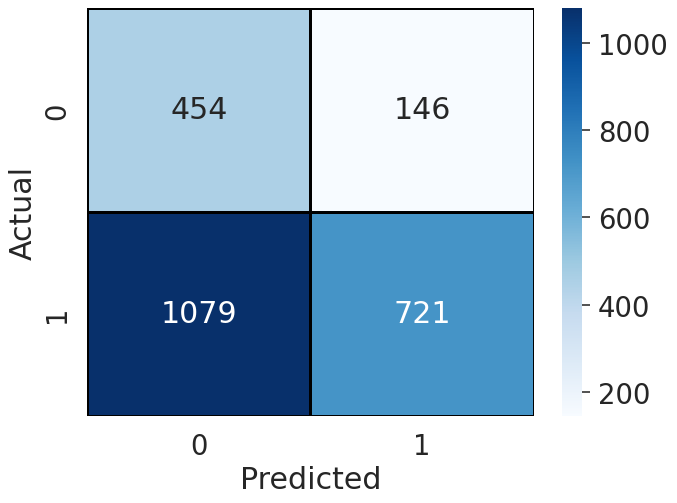

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Logistic_regression(clf_collection_tf)
clf_collection_tf.train(unclean_smote_trainx, unclean_smote_trainy,unlclean_smote_validx,unclean_smote_validy)           ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Smote

List of Accuracies ::  {'Logistric regrssion': 53.2917}
Get Maximum Result ::  Logistric regrssion:
Accurracy: 53.2917
Recall and Precision:
              precision    recall  f1-score   support

           0       0.29      0.59      0.39       600
           1       0.79      0.51      0.62      1800

    accuracy                           0.53      2400
   macro avg       0.54      0.55      0.51      2400
weighted avg       0.67      0.53      0.56      2400



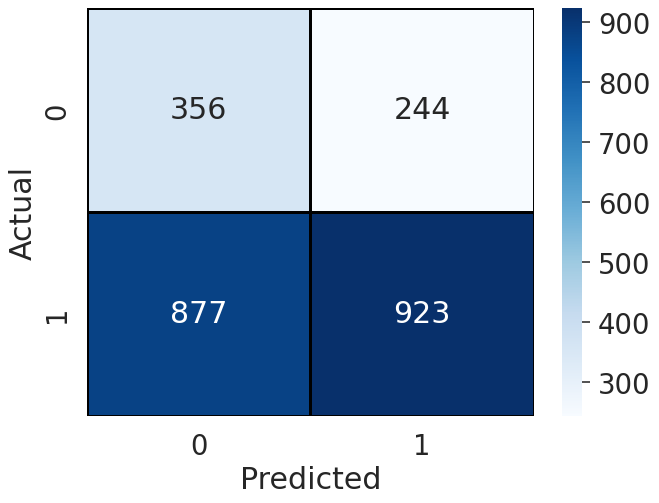

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Logistic_regression(clf_collection_tf)
clf_collection_tf.train(clean_smote_trainx, clean_smote_trainy, clean_smote_validx, clean_smote_validy)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### clean imbalanced

List of Accuracies ::  {'Logistric regrssion': 50.3333}
Get Maximum Result ::  Logistric regrssion:
Accurracy: 50.3333
Recall and Precision:
              precision    recall  f1-score   support

           0       0.31      0.79      0.44       600
           1       0.85      0.41      0.55      1800

    accuracy                           0.50      2400
   macro avg       0.58      0.60      0.50      2400
weighted avg       0.72      0.50      0.52      2400



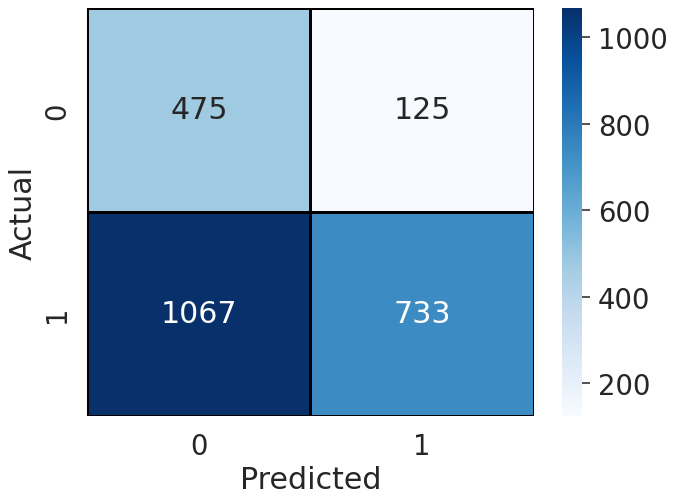

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Logistic_regression(clf_collection_tf)
clf_collection_tf.train(Xtrain_clean, Ytrain_clean, Xvalid_clean, Yvalid_clean)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

## SVM Classifier

### Unclean & Unbalanced

List of Accuracies ::  {'Support Vector Machine': 72.7083}
Get Maximum Result ::  Support Vector Machine:
Accurracy: 72.7083
Recall and Precision:
              precision    recall  f1-score   support

           0       0.42      0.25      0.31       600
           1       0.78      0.89      0.83      1800

    accuracy                           0.73      2400
   macro avg       0.60      0.57      0.57      2400
weighted avg       0.69      0.73      0.70      2400



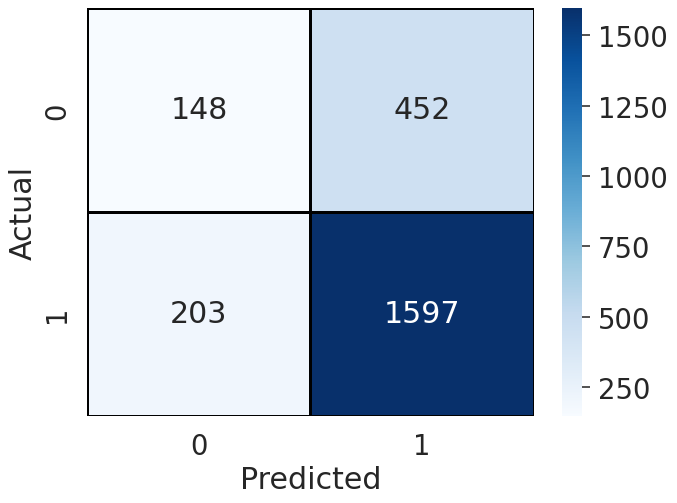

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_SVM(clf_collection_tf)
clf_collection_tf.train(Xtrain, Ytrain, Xvalid, Yvalid)               ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Trasnpose

List of Accuracies ::  {'Support Vector Machine': 25.4583}
Get Maximum Result ::  Support Vector Machine:
Accurracy: 25.4583
Recall and Precision:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40       600
           1       0.87      0.01      0.01      1800

    accuracy                           0.25      2400
   macro avg       0.56      0.50      0.21      2400
weighted avg       0.71      0.25      0.11      2400



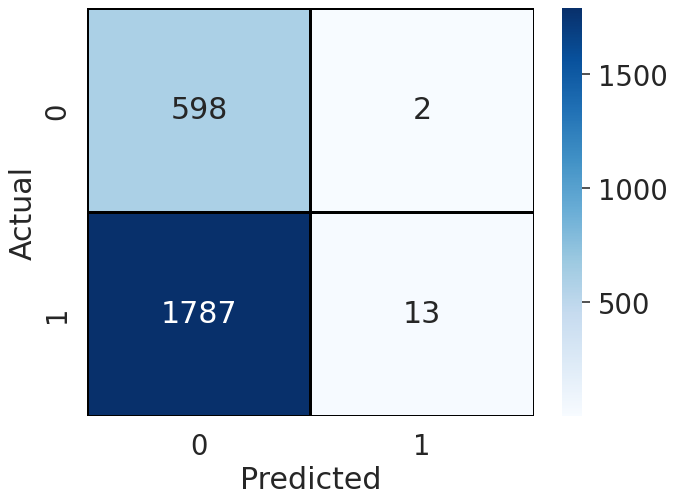

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_SVM(clf_collection_tf)
clf_collection_tf.train(unclean_trans_train, unclean_trans_y, unclean_t_valid, unclean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Transpose

List of Accuracies ::  {'Support Vector Machine': 47.2917}
Get Maximum Result ::  Support Vector Machine:
Accurracy: 47.2917
Recall and Precision:
              precision    recall  f1-score   support

           0       0.28      0.72      0.41       600
           1       0.81      0.39      0.53      1800

    accuracy                           0.47      2400
   macro avg       0.55      0.56      0.47      2400
weighted avg       0.68      0.47      0.50      2400



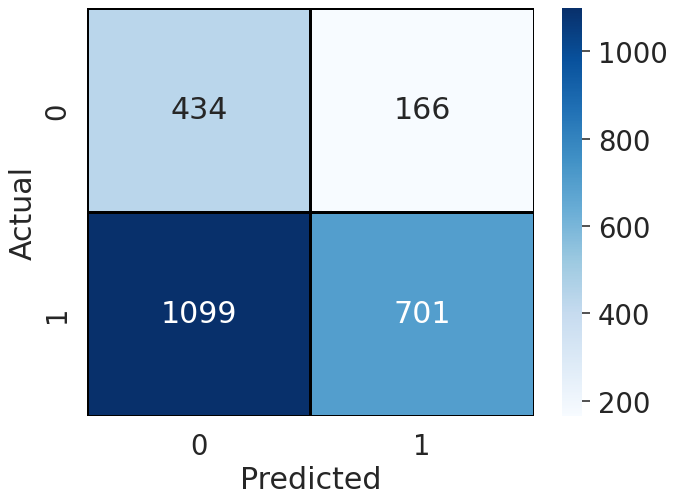

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_SVM(clf_collection_tf)
clf_collection_tf.train(clean_trans_train, clean_trans_y, clean_t_valid, clean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Smote

List of Accuracies ::  {'Support Vector Machine': 74.6667}
Get Maximum Result ::  Support Vector Machine:
Accurracy: 74.6667
Recall and Precision:
              precision    recall  f1-score   support

           0       0.43      0.04      0.07       600
           1       0.75      0.98      0.85      1800

    accuracy                           0.75      2400
   macro avg       0.59      0.51      0.46      2400
weighted avg       0.67      0.75      0.66      2400



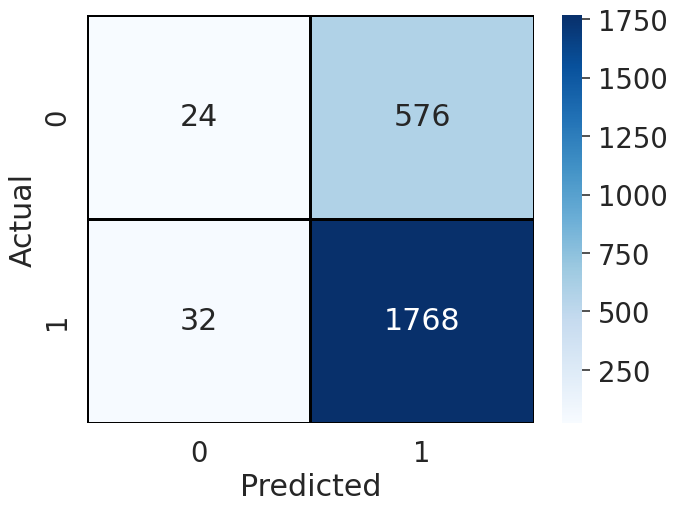

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_SVM(clf_collection_tf)
clf_collection_tf.train(unclean_smote_trainx, unclean_smote_trainy,unlclean_smote_validx,unclean_smote_validy)           ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Smote

List of Accuracies ::  {'Support Vector Machine': 74.2083}
Get Maximum Result ::  Support Vector Machine:
Accurracy: 74.2083
Recall and Precision:
              precision    recall  f1-score   support

           0       0.31      0.03      0.05       600
           1       0.75      0.98      0.85      1800

    accuracy                           0.74      2400
   macro avg       0.53      0.50      0.45      2400
weighted avg       0.64      0.74      0.65      2400



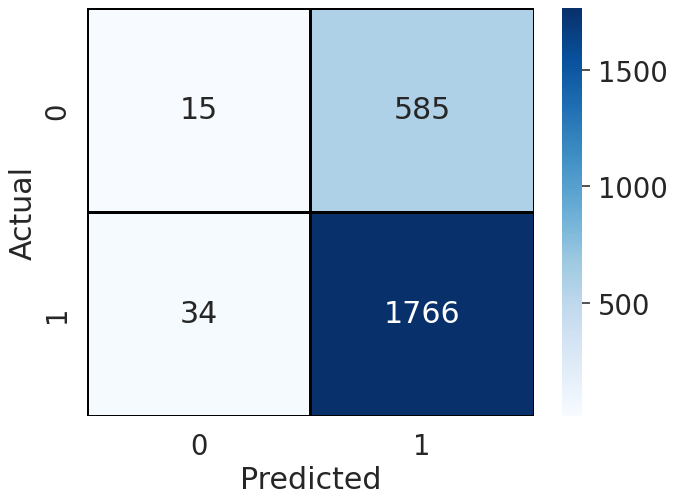

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_SVM(clf_collection_tf)
clf_collection_tf.train(clean_smote_trainx, clean_smote_trainy, clean_smote_validx, clean_smote_validy)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### imbalanced clean

List of Accuracies ::  {'Support Vector Machine': 72.7083}
Get Maximum Result ::  Support Vector Machine:
Accurracy: 72.7083
Recall and Precision:
              precision    recall  f1-score   support

           0       0.42      0.25      0.31       600
           1       0.78      0.89      0.83      1800

    accuracy                           0.73      2400
   macro avg       0.60      0.57      0.57      2400
weighted avg       0.69      0.73      0.70      2400



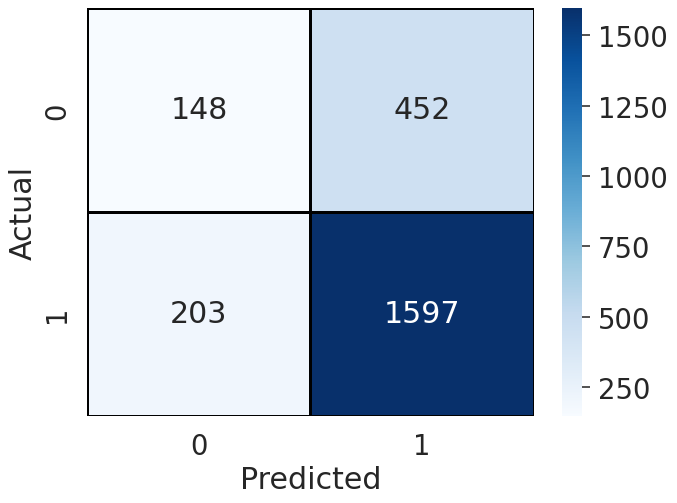

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_SVM(clf_collection_tf)
clf_collection_tf.train(Xtrain_clean, Ytrain_clean, Xvalid_clean, Yvalid_clean)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

## Decision Tree Classifier

### Unclean & Unbalanced

List of Accuracies ::  {'Decision Tree': 54.2917}
Get Maximum Result ::  Decision Tree:
Accurracy: 54.2917
Recall and Precision:
              precision    recall  f1-score   support

           0       0.29      0.59      0.39       600
           1       0.79      0.53      0.63      1800

    accuracy                           0.54      2400
   macro avg       0.54      0.56      0.51      2400
weighted avg       0.67      0.54      0.57      2400



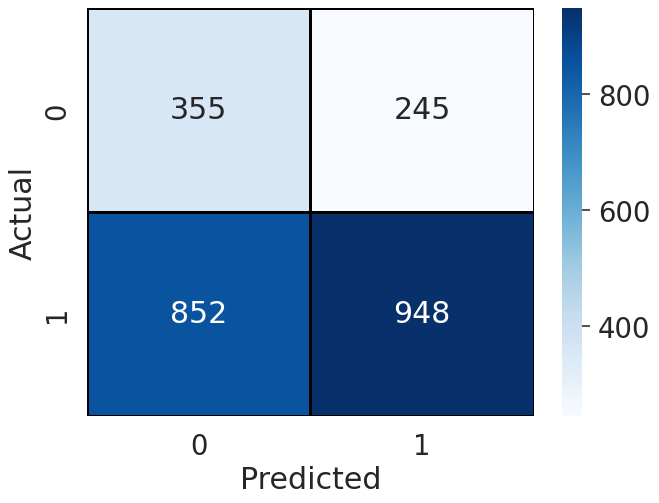

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Decision_Tree(clf_collection_tf)
clf_collection_tf.train(Xtrain, Ytrain, Xvalid, Yvalid)               ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Trasnpose

List of Accuracies ::  {'Decision Tree': 59.7917}
Get Maximum Result ::  Decision Tree:
Accurracy: 59.7917
Recall and Precision:
              precision    recall  f1-score   support

           0       0.27      0.36      0.31       600
           1       0.76      0.68      0.72      1800

    accuracy                           0.60      2400
   macro avg       0.52      0.52      0.51      2400
weighted avg       0.64      0.60      0.61      2400



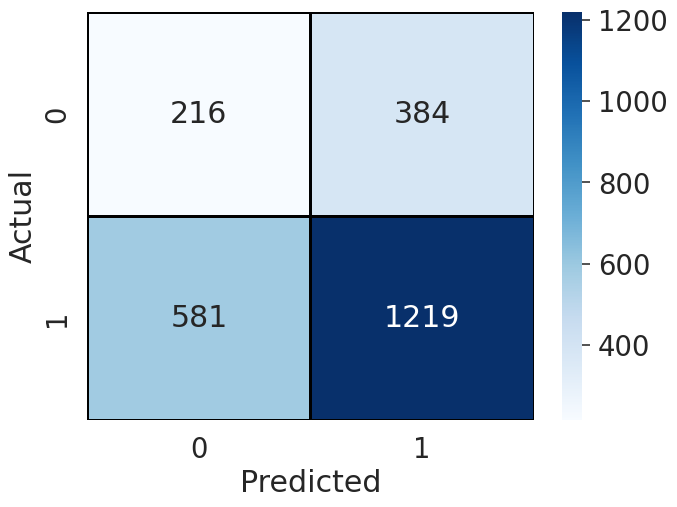

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Decision_Tree(clf_collection_tf)
clf_collection_tf.train(unclean_trans_train, unclean_trans_y, unclean_t_valid, unclean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Transpose

List of Accuracies ::  {'Decision Tree': 48.1667}
Get Maximum Result ::  Decision Tree:
Accurracy: 48.1667
Recall and Precision:
              precision    recall  f1-score   support

           0       0.26      0.56      0.35       600
           1       0.76      0.46      0.57      1800

    accuracy                           0.48      2400
   macro avg       0.51      0.51      0.46      2400
weighted avg       0.63      0.48      0.51      2400



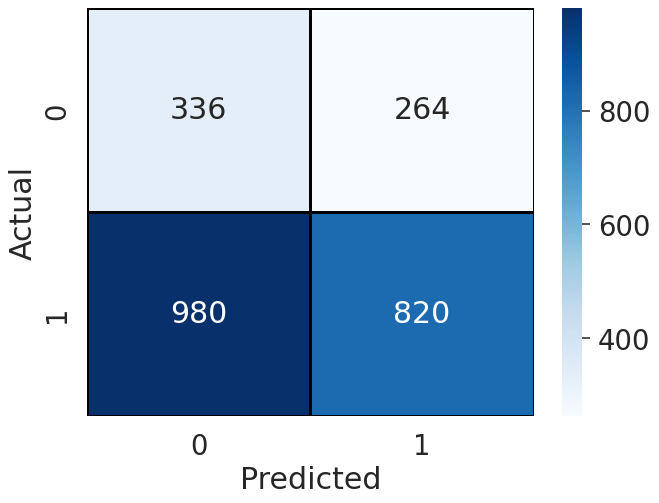

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Decision_Tree(clf_collection_tf)
clf_collection_tf.train(clean_trans_train, clean_trans_y, clean_t_valid, clean_t_y)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Unclean Smote

List of Accuracies ::  {'Decision Tree': 60.3333}
Get Maximum Result ::  Decision Tree:
Accurracy: 60.3333
Recall and Precision:
              precision    recall  f1-score   support

           0       0.30      0.44      0.36       600
           1       0.78      0.66      0.71      1800

    accuracy                           0.60      2400
   macro avg       0.54      0.55      0.53      2400
weighted avg       0.66      0.60      0.62      2400



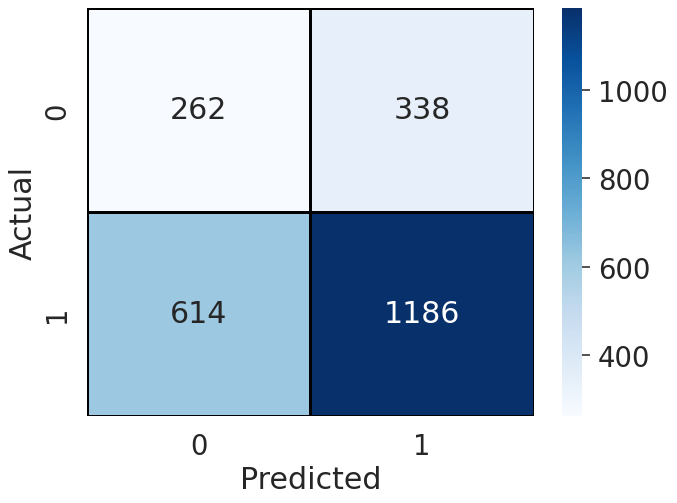

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Decision_Tree(clf_collection_tf)
clf_collection_tf.train(unclean_smote_trainx, unclean_smote_trainy,unlclean_smote_validx,unclean_smote_validy)           ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### Clean Smote

List of Accuracies ::  {'Decision Tree': 54.5}
Get Maximum Result ::  Decision Tree:
Accurracy: 54.5
Recall and Precision:
              precision    recall  f1-score   support

           0       0.25      0.42      0.32       600
           1       0.75      0.59      0.66      1800

    accuracy                           0.55      2400
   macro avg       0.50      0.50      0.49      2400
weighted avg       0.63      0.55      0.57      2400



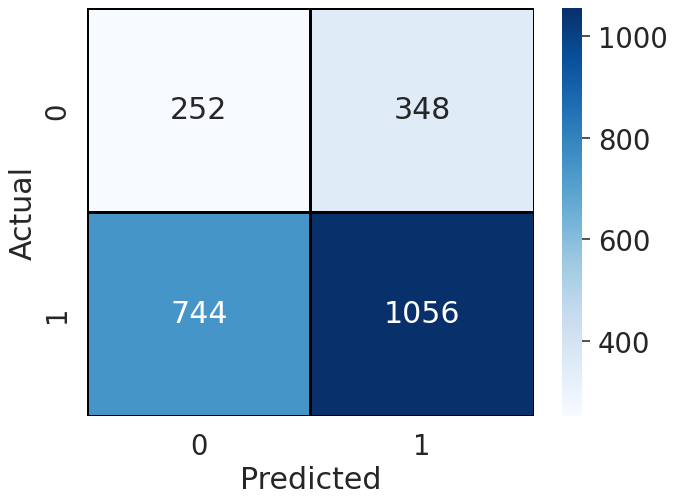

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Decision_Tree(clf_collection_tf)
clf_collection_tf.train(clean_smote_trainx, clean_smote_trainy, clean_smote_validx, clean_smote_validy)                  ## Change Data Only
print("List of Accget_collection_of_Decision_Treeuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

### imbalanced clean

List of Accuracies ::  {'Decision Tree': 56.25}
Get Maximum Result ::  Decision Tree:
Accurracy: 56.25
Recall and Precision:
              precision    recall  f1-score   support

           0       0.29      0.53      0.38       600
           1       0.79      0.57      0.66      1800

    accuracy                           0.56      2400
   macro avg       0.54      0.55      0.52      2400
weighted avg       0.66      0.56      0.59      2400



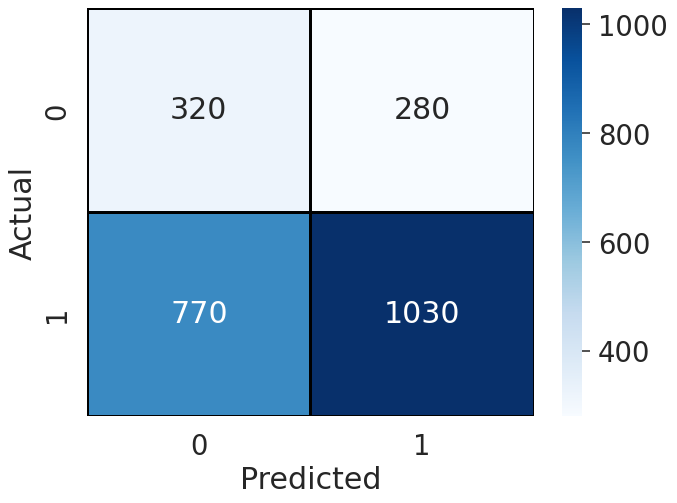

In [ ]:
clf_collection_tf = ClassifierCollection([])
get_collection_of_Decision_Tree(clf_collection_tf)
clf_collection_tf.train(Xtrain_clean, Ytrain_clean, Xvalid_clean, Yvalid_clean)                  ## Change Data Only
print("List of Accuracies :: ", clf_collection_tf.get_list_accuracy())
print("Get Maximum Result :: ", clf_collection_tf.get_max())
clf_collection_tf.ploting()

# Ensemble models

In [ ]:
Xtrain.shape


(11200, 1000)

In [ ]:
Ytrain.shape


(11200,)

In [ ]:
Xvalid.shape


(2400, 1000)

In [ ]:
Yvalid.shape

(2400,)

## voting classifier

In [ ]:
# import voting classifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm

Xtrain, Ytrain, Xvalid, Yvalid
# create a voting classifier with hard voting
voting_classifier_hard = VotingClassifier(
    estimators = [('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('svm',svm.SVC(kernel='linear',probability=True)),
                                              ('gnb', GaussianNB())], voting='hard')

# create a voting classifier with soft voting
voting_classifier_soft = VotingClassifier(
    estimators = [('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('svm',svm.SVC(kernel='linear',probability=True)),
                                              ('gnb', GaussianNB())], voting='soft')

# make predictions with the hard voting model
voting_classifier_hard.fit(Xtrain, Ytrain)
y_pred_vch = voting_classifier_hard.predict(Xvalid)

# make predictions with the soft voting model
voting_classifier_soft.fit(Xtrain, Ytrain)
y_pred_vcs = voting_classifier_soft.predict(Xvalid)

# evaluate both models with the f-1 score
f1_vch = f1_score(Yvalid, y_pred_vch, average='macro')
f1_vcs = f1_score(Yvalid, y_pred_vcs, average='macro')

# print the f-1 scores
print('F1-score of the hard voting classifier: {}'.format(np.round(f1_vch,4)))
print('F1-score of the soft voting classifier: {}'.format(np.round(f1_vcs,4)))


F1-score of the hard voting classifier: 0.4658
F1-score of the soft voting classifier: 0.5645


## stacking

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

In [ ]:
# evaluate a give model using cross-validation
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_validate
#Scores
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 }

def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_validate(model, X, y, scoring=custom_scorer, cv=cv, n_jobs=-1, error_score='raise', return_train_score=False)
	return scores

In [ ]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
scores = {}
x = []
y = []
for name, model in models.items():
	scores = evaluate_model(model, Xtrain, Ytrain)
	results.append(scores)
	names.append(name)
	for key, value in scores.items():
		my_dict = {key:value.mean()}
		new_dict = {key:value.std()}
		x.append(my_dict)
		y.append(new_dict)
	print("Name = ",name)
	print("Mean = ",my_dict)
	print("Standard Deviation = ",new_dict)

Name =  lr
Mean =  {'test_f1': 0.5286917833659577}
Standard Deviation =  {'test_f1': 0.012974395899049635}
Name =  knn
Mean =  {'test_f1': 0.4880568299374982}
Standard Deviation =  {'test_f1': 0.01508077191061137}
Name =  cart
Mean =  {'test_f1': 0.6110514474260119}
Standard Deviation =  {'test_f1': 0.009165101335388351}


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Name =  svm
Mean =  {'test_f1': 0.4495408708300793}
Standard Deviation =  {'test_f1': 0.007514350587614099}
Name =  bayes
Mean =  {'test_f1': 0.5681005705523319}
Standard Deviation =  {'test_f1': 0.011857029194626039}


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Name =  stacking
Mean =  {'test_f1': 0.600234703331732}
Standard Deviation =  {'test_f1': 0.016231703597840957}
